# Modelagem Matemática de Doenças Infecciosas (Estudos)

## Atividade (18/03/24): Modelagem envolvendo doenças sexualmente transmissíveis

**Hipóteses para a modelagem**

* Existem dois grupos, um de alto risco ,$N_H$, e outro de baixo risco, $N_L$.
* A dinâmica da doença é do tipo $SIS$ com dinâmica vital.
* Não há migração entre os grupos, indivíduos que nascem em  um grupo passam toda a vida nele. Portanto, $N_H$ e $N_L$ são constantes, i.e., $N_H=S_H+I_H$ e $N_L=S_L+I_L$.
* População total $N_0=N_H+N_L$. 

O modelo matemático é dado por:

$$\left\{\begin{array}{llll}
         \dfrac{dI_H}{dt}=\beta_{HH} S_H I_H+\beta_{HL}S_HI_L-\gamma I_H,\\
         \\
         \dfrac{dI_L}{dt}=\beta_{LH} S_LI_H - \beta_{LL}S_LI_L-\gamma I_L.
\end{array}\right.$$

Reescrevendo o modelo, temos,

$$\left\{\begin{array}{llll}
         \dfrac{di_H}{dt}=\beta_{HH}N_0 s_H i_H+\beta_{HL}N_0 s_H i_L-(\eta+\mu) i_H,\\
         \\
         \dfrac{di_L}{dt}=\beta_{LH}N_0s_Li_H + \beta_{LL}N_0s_Li_L-(\eta+\mu) i_L,
\end{array}\right.$$

em que $s_H=\dfrac{S_H}{N_0}$, $i_H=\dfrac{I_H}{N_0}$, $s_L=\dfrac{S_L}{N_0}$ e $i_L=\dfrac{I_L}{N_0}$.

A matriz de transmissão ($\beta_{H\leftarrow L}$) é dada por

$$\bar{\beta}=\begin{pmatrix} 
\beta_{HH}N_0 & \beta_{HL}N_0\\
\\
\beta_{LH}N_0 & \beta_{LL}N_0
\end{pmatrix}.$$

Keeling e Rohani conceitualizam matrizes de transmissão, frequentemente referidas como matrizes WAIFW (Who Acquires Infection From Whom), como ferramentas para capturar a interação entre diferentes estratos sociais. A matriz $\hat\beta$ é analogamente relevante ao parâmetro escalar $\beta$ em modelos não estruturados. Esta análise visa esclarecer essa relação. Inicialmente, avaliamos a importância relativa dos termos da matriz. É esperado que o risco de infecção seja maior para os indivíduos em grupos de alto risco, sugerindo que a soma dos parâmetros de transmissão intra e intergrupos ($\beta_{HH} + \beta_{HL}$) seja maior que a soma dos parâmetros entre grupos de baixo risco ($\beta_{LH} + \beta_{LL}$). Além disso, é presumível uma associação seletiva, onde indivíduos de alto risco têm maior probabilidade de interagir entre si, enquanto aqueles de baixo risco tendem a ter relacionamentos com outros membros do mesmo estrato. Esta tendência sugere que os elementos diagonais da matriz são predominantes, sendo $\beta_{HH}$ o mais significativo. Por fim, assumimos interações simétricas entre grupos, implicando que o número de interações entre grupos de alto e baixo risco seja igual ao de baixo para alto; isso implica $\beta_{HL} = \beta_{LH}$, ou, mais amplamente, que a matriz seja simétrica. Essa suposição reflete a igualdade na resposta dos indivíduos de ambos os estratos ao desafio infeccioso; no entanto, se um grupo for mais suscetível por algum motivo, a simetria pode ser comprometida.

Supondo que existam dois limiares, um para cada classe, de maneira que

$$R_0^H=\dfrac{\beta_{HH} N_0 s_H}{\eta+\mu}+\dfrac{\beta_{LH} N_0s_L}{\eta+\mu} $$

$$R_0^L=\dfrac{\beta_{LL} N_0 s_L}{\eta+\mu}+\dfrac{\beta_{HL} N_0s_H}{\eta+\mu} $$

### Exemplo -- Caso 1: 

Seja $n_H=0.2$, $n_L=0.8$, $\eta = 1$ e $\mu=0$. Supondo que $\beta_{HH}N_0=10$, $\beta_{HL}N_0=\beta_{LH}N_0=0.1$ e $\beta_{LL}N_0=1$.


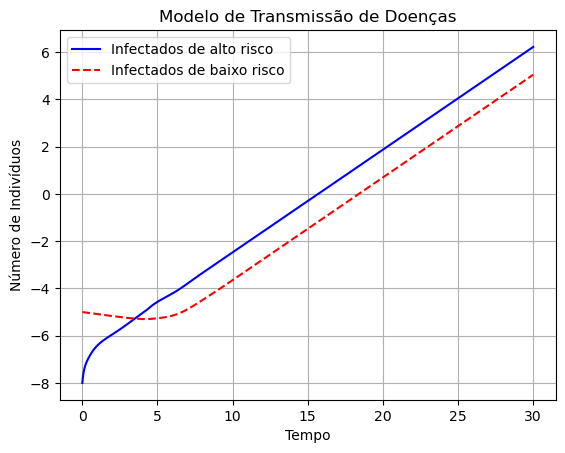

In [38]:
import numpy as np
from scipy.integrate import solve_ivp

def modelo(t, y, beta_HH_N0, beta_HL_N0, beta_LH_N0, beta_LL_N0, eta, mu, n_H, n_L):

    i_H, i_L = y
    
    dydt = [
        (beta_HH_N0 * n_H - eta) * i_H + beta_HL_N0 * n_H * i_L,
        (beta_LL_N0 * n_L - eta) * i_L + beta_LH_N0 * n_L * i_H
    ]
    
    return dydt

# Parâmetros do modelo
N0 = 1000  # População total
n_H = 0.2
n_L = 0.8
beta_HH_N0 = 10
beta_HL_N0 = 0.1
beta_LH_N0 = 0.1
beta_LL_N0 = 1
eta = 1
mu = 0

# Condições iniciais
I_H =1   # Exemplo de número inicial de infectados de alto risco
I_L = 1   # Exemplo de número inicial de infectados de baixo risco
y0 = [1e-8, 1e-5]

# Tempo
t_span = (0, 30)
t_eval = np.linspace(0, 30, 1000)

# Resolvendo as equações diferenciais
sol = solve_ivp(
    lambda t, y: modelo(t, y, beta_HH_N0, beta_HL_N0, beta_LH_N0, beta_LL_N0, eta, mu, n_H, n_L),
    t_span,
    y0,
    t_eval=t_eval
)

# Plotando os resultados (opcional)
import matplotlib.pyplot as plt
plt.plot(sol.t, np.log10(sol.y[0]),'-b',label='Infectados de alto risco')
plt.plot(sol.t, np.log10(sol.y[1]), '--r',label='Infectados de baixo risco')
plt.xlabel('Tempo')
plt.ylabel('Número de Indivíduos')
plt.title('Modelo de Transmissão de Doenças')
plt.legend()
plt.grid(True)
plt.show()


In [39]:
def R0(beta_HH, beta_HL, beta_LH, beta_LL, eta, mu, N0, n_H, n_L):

    R0_H = (beta_HH_N0 * n_H + beta_LH_N0 * n_L) / (eta + mu)
    R0_L = (beta_LL_N0 * n_L + beta_HL_N0 * n_H) / (eta + mu)
    
    return R0_H, R0_L

# Calculando R0 para os grupos de alto risco e baixo risco
R0_H, R0_L = R0(beta_HH_N0, beta_HL_N0, beta_LH_N0, beta_LL_N0, eta, mu, N0, n_H, n_L)

print("R0 para o grupo de alto risco:", R0_H)
print("R0 para o grupo de baixo risco:", R0_L)


R0 para o grupo de alto risco: 2.08
R0 para o grupo de baixo risco: 0.8200000000000001


### Exemplo -- Caso 2

Seja $n_H=0.2$, $n_L=0.8$, $\eta = 1$ e $\mu=0$. Supondo que $\beta_{HH}N_0=1$, $\beta_{HL}N_0=\beta_{LH}N_0=1.5$ e $\beta_{LL}N_0=0.5$.



R0 para o grupo de alto risco: 1.4000000000000001
R0 para o grupo de baixo risco: 0.7000000000000001


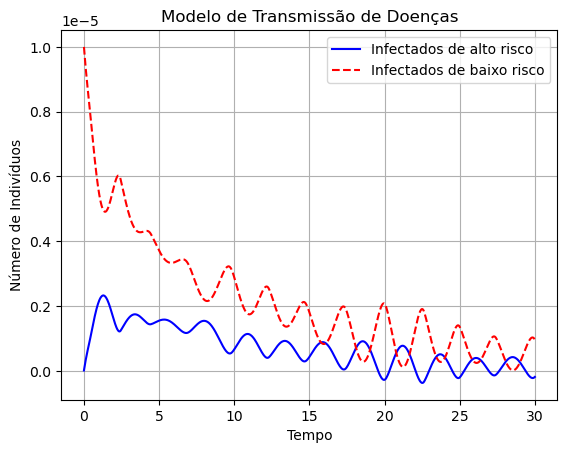

In [42]:
# Parâmetros do modelo
N0 = 1000  # População total
n_H = 0.2
n_L = 0.8
beta_HH_N0 = 1
beta_HL_N0 = 1.5
beta_LH_N0 = 1.5
beta_LL_N0 = 0.5
eta = 1
mu = 0

# Condições iniciais
I_H =1   # Exemplo de número inicial de infectados de alto risco
I_L = 1   # Exemplo de número inicial de infectados de baixo risco
y0 = [1e-8, 1e-5]

# Tempo
t_span = (0, 30)
t_eval = np.linspace(0, 30, 1000)

# Resolvendo as equações diferenciais
sol2 = solve_ivp(
    lambda t, y: modelo(t, y, beta_HH_N0, beta_HL_N0, beta_LH_N0, beta_LL_N0, eta, mu, n_H, n_L),
    t_span,
    y0,
    t_eval=t_eval
)

# Calculando R0 para os grupos de alto risco e baixo risco
R0_H, R0_L = R0(beta_HH_N0, beta_HL_N0, beta_LH_N0, beta_LL_N0, eta, mu, N0, n_H, n_L)

print("R0 para o grupo de alto risco:", R0_H)
print("R0 para o grupo de baixo risco:", R0_L)

# Plotando os resultados (opcional)
import matplotlib.pyplot as plt
plt.plot(sol2.t, sol2.y[0],'-b',label='Infectados de alto risco')
plt.plot(sol2.t, sol2.y[1], '--r',label='Infectados de baixo risco')
plt.xlabel('Tempo')
plt.ylabel('Número de Indivíduos')
plt.title('Modelo de Transmissão de Doenças')
plt.legend()
plt.grid(True)
plt.show()

### Exemplo -- Caso 3

Seja $n_H=0.2$, $n_L=0.8$, $\eta = 1$ e $\mu=0$. Supondo que $\beta_{HH}N_0=10$, $\beta_{HL}N_0=\beta_{LH}N_0=1$ e $\beta_{LL}N_0=2$.

R0 para o grupo de alto risco: 2.8
R0 para o grupo de baixo risco: 1.8


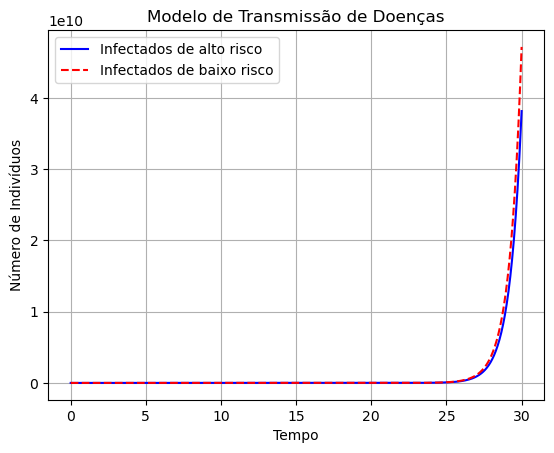

In [43]:
# Parâmetros do modelo
N0 = 1000  # População total
n_H = 0.2
n_L = 0.8
beta_HH_N0 = 10
beta_HL_N0 = 1
beta_LH_N0 = 1
beta_LL_N0 = 2
eta = 1
mu = 0

# Condições iniciais
I_H =1   # Exemplo de número inicial de infectados de alto risco
I_L = 1   # Exemplo de número inicial de infectados de baixo risco
y0 = [1e-8, 1e-5]

# Tempo
t_span = (0, 30)
t_eval = np.linspace(0, 30, 1000)

# Resolvendo as equações diferenciais
sol2 = solve_ivp(
    lambda t, y: modelo(t, y, beta_HH_N0, beta_HL_N0, beta_LH_N0, beta_LL_N0, eta, mu, n_H, n_L),
    t_span,
    y0,
    t_eval=t_eval
)

# Calculando R0 para os grupos de alto risco e baixo risco
R0_H, R0_L = R0(beta_HH_N0, beta_HL_N0, beta_LH_N0, beta_LL_N0, eta, mu, N0, n_H, n_L)

print("R0 para o grupo de alto risco:", R0_H)
print("R0 para o grupo de baixo risco:", R0_L)

# Plotando os resultados (opcional)
import matplotlib.pyplot as plt
plt.plot(sol2.t, sol2.y[0],'-b',label='Infectados de alto risco')
plt.plot(sol2.t, sol2.y[1], '--r',label='Infectados de baixo risco')
plt.xlabel('Tempo')
plt.ylabel('Número de Indivíduos')
plt.title('Modelo de Transmissão de Doenças')
plt.legend()
plt.grid(True)
plt.show()